# Fuzzy C Clustering

In [64]:
# Importing all required header files
import pandas as pd 
import numpy as np
import random
import operator
import math
import matplotlib.pyplot as plt 
from scipy.stats import multivariate_normal     # for generating pdf

In [65]:
#iris data
df_full = pd.read_csv("iris.data",names = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Species']) 

In [66]:
df_full.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [67]:
df_full.shape

(150, 5)

In [68]:
columns = list(df_full.columns)
features = columns[:len(columns)-1]
class_labels = list(df_full[columns[-1]])
df = df_full[features]

#### Defining parameters

In [69]:
k = 3            # Number of Clusters
MAX_ITER = 100   # Maximum number of iterations
n = len(df)      # Number of data points
m = 1.7          # Fuzzy parameter- Select a value greater than 1 else it will be knn

#### Scatter Plots

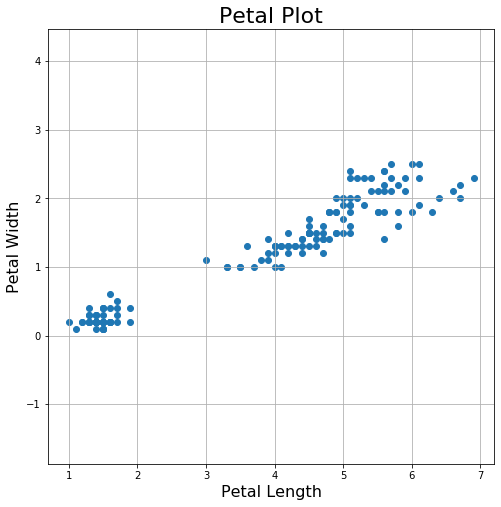

In [70]:
plt.figure(figsize=(8,8))                    #scatter plot of petal length vs sepal width                          
plt.scatter(list(df.iloc[:,2]), list(df.iloc[:,3]), marker='o')       
plt.axis('equal')                                                                 
plt.xlabel('Petal Length', fontsize=16)                                                 
plt.ylabel('Petal Width', fontsize=16)                                                 
plt.title('Petal Plot', fontsize=22)                                            
plt.grid()                                                                         
plt.show()

#### Initialize membership matrix

In [71]:
def initializeMembershipMatrix(): # initializing the membership matrix
    membership_mat = []
    for i in range(n):
        random_num_list = [random.random() for i in range(k)]
        summation = sum(random_num_list)
        temp_list = [x/summation for x in random_num_list]
        
        flag = temp_list.index(max(temp_list))
        for j in range(0,len(temp_list)):
            if(j == flag):
                temp_list[j] = 1
            else:
                temp_list[j] = 0
        
        membership_mat.append(temp_list)
    return membership_mat

In [72]:
membership_mat = initializeMembershipMatrix()

#### Calculating Cluster Center

In [73]:
def calculateClusterCenter(membership_mat): # calculating the cluster center
    cluster_mem_val = list(zip(*membership_mat))
    cluster_centers = []
    for j in range(k):
        x = list(cluster_mem_val[j])
        xraised = [p ** m for p in x]
        denominator = sum(xraised)
        temp_num = []
        for i in range(n):
            data_point = list(df.iloc[i])
            prod = [xraised[i] * val for val in data_point]
            temp_num.append(prod)
        numerator = map(sum, list(zip(*temp_num)))
        center = [z/denominator for z in numerator]
        cluster_centers.append(center)
    return cluster_centers

In [74]:
#cluster_centers = calculateClusterCenter(membership_mat)
calculateClusterCenter(membership_mat)

[[5.881395348837209,
  3.0976744186046514,
  3.7069767441860475,
  1.1813953488372089],
 [5.837999999999999,
  3.0440000000000005,
  3.815999999999999,
  1.2419999999999998],
 [5.819298245614034,
  3.0298245614035095,
  3.747368421052631,
  1.1736842105263154]]

#### Updating Membership Value

In [75]:
def updateMembershipValue(membership_mat, cluster_centers): # Updating the membership value
    p = float(2/(m-1))
    for i in range(n):
        x = list(df.iloc[i])
        distances = [np.linalg.norm(np.array(list(map(operator.sub, x, cluster_centers[j])))) for j in range(k)]
        for j in range(k):
            den = sum([math.pow(float(distances[j]/distances[c]), p) for c in range(k)])
            membership_mat[i][j] = float(1/den)       
    return membership_mat

#### Getting the clusters

In [76]:
def getClusters(membership_mat): # getting the clusters
    cluster_labels = list()
    for i in range(n):
        max_val, idx = max((val, idx) for (idx, val) in enumerate(membership_mat[i]))
        cluster_labels.append(idx)
    return cluster_labels

#### Fuzzy C-Means with cluster centers at random vectors chosen from the data.

In [77]:
def fuzzyCMeansClustering(): #Third iteration Random vectors from data
    # Membership Matrix
    membership_mat = initializeMembershipMatrix()
    curr = 0
    acc=[]
    while curr < MAX_ITER:
        cluster_centers = calculateClusterCenter(membership_mat)
        membership_mat = updateMembershipValue(membership_mat, cluster_centers)
        cluster_labels = getClusters(membership_mat)
        
        acc.append(cluster_labels)
        
        if(curr == 0):
            print("Cluster Centers:")
            print(np.array(cluster_centers))
        curr += 1
    print("---------------------------")
    print("Partition matrix:")
    print(np.array(membership_mat))
    #return cluster_labels, cluster_centers
    return cluster_labels, cluster_centers, acc

In [78]:
labels, centers, acc = fuzzyCMeansClustering()

Cluster Centers:
[[5.875      3.03035714 3.88035714 1.22678571]
 [5.78333333 3.04047619 3.61190476 1.14285714]
 [5.85769231 3.09038462 3.74615385 1.21346154]]
---------------------------
Partition matrix:
[[5.67819162e-05 9.99770794e-01 1.72424329e-04]
 [8.86481003e-04 9.96289054e-01 2.82446451e-03]
 [7.19013163e-04 9.97101689e-01 2.17929773e-03]
 [1.40779918e-03 9.94099369e-01 4.49283135e-03]
 [1.21557690e-04 9.99514701e-01 3.63741759e-04]
 [4.21005758e-03 9.82814052e-01 1.29758903e-02]
 [7.57109076e-04 9.96935703e-01 2.30718744e-03]
 [2.66508464e-06 9.99988930e-01 8.40484306e-06]
 [4.45892768e-03 9.81705950e-01 1.38351228e-02]
 [5.38252020e-04 9.97732122e-01 1.72962558e-03]
 [1.47299186e-03 9.94108059e-01 4.41894904e-03]
 [1.84218020e-04 9.99223933e-01 5.91849425e-04]
 [1.20017378e-03 9.95029147e-01 3.77067942e-03]
 [5.52748695e-03 9.78743610e-01 1.57289028e-02]
 [1.03172071e-02 9.62915366e-01 2.67674268e-02]
 [1.84083981e-02 9.34117495e-01 4.74741073e-02]
 [3.27260430e-03 9.87557694

In [79]:
print("Cluster center vectors:") #final cluster centers
print(np.array(centers))

Cluster center vectors:
[[6.80722429 3.05991213 5.68331178 2.06091097]
 [5.00525867 3.40761295 1.48051039 0.25084584]
 [5.8877322  2.75271885 4.36949728 1.40585918]]


#### Plotting the data

In [80]:
#finding mode
seto = max(set(labels[0:50]), key=labels[0:50].count)
vers = max(set(labels[50:100]), key=labels[50:100].count)
virg = max(set(labels[100:]), key=labels[100:].count)

In [81]:
#petal
p_mean_clus1 = np.array([centers[seto][2],centers[seto][3]])
p_mean_clus2 = np.array([centers[vers][2],centers[vers][3]])
p_mean_clus3 = np.array([centers[virg][2],centers[virg][3]])

In [101]:
petal_df = df_full.iloc[:,2:4]

In [83]:
values = np.array(labels) #label

#search all 3 species
searchval_seto = seto
searchval_vers = vers
searchval_virg = virg

#index of all 3 species
ii_seto = np.where(values == searchval_seto)[0]
ii_vers = np.where(values == searchval_vers)[0]
ii_virg = np.where(values == searchval_virg)[0]
ind_seto = list(ii_seto)
ind_vers = list(ii_vers)
ind_virg = list(ii_virg)

In [84]:
seto_df = petal_df[petal_df.index.isin(ind_seto)]
vers_df = petal_df[petal_df.index.isin(ind_vers)]
virg_df = petal_df[petal_df.index.isin(ind_virg)]

In [85]:
cov_seto = np.cov(np.transpose(np.array(seto_df)))
cov_vers = np.cov(np.transpose(np.array(vers_df)))
cov_virg = np.cov(np.transpose(np.array(virg_df)))

In [103]:
petal_df = np.array(petal_df)

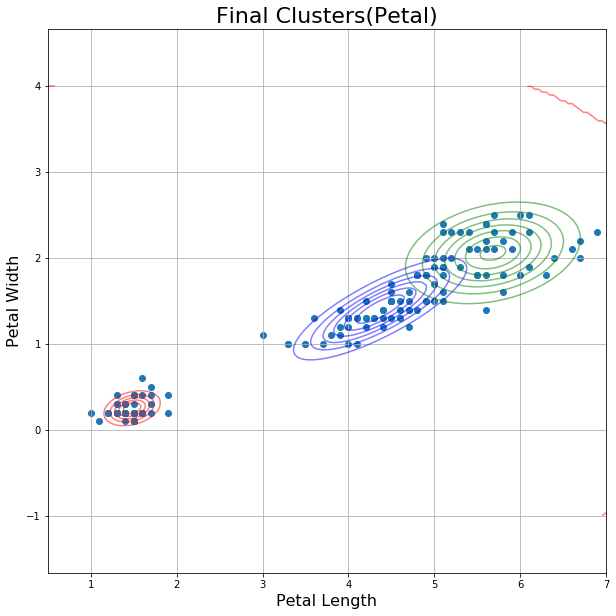

In [87]:
x1 = np.linspace(0.5,7,150)  
x2 = np.linspace(-1,4,150)
X, Y = np.meshgrid(x1,x2) 

Z1 = multivariate_normal(p_mean_clus1, cov_seto)  
Z2 = multivariate_normal(p_mean_clus2, cov_vers)
Z3 = multivariate_normal(p_mean_clus3, cov_virg)

pos = np.empty(X.shape + (2,))                # a new array of given shape and type, without initializing entries
pos[:, :, 0] = X; pos[:, :, 1] = Y   

plt.figure(figsize=(10,10))                   # creating the figure and assigning the size
plt.scatter(petal_df[:,0], petal_df[:,1], marker='o')     
plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5) 
plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5) 
plt.contour(X, Y, Z3.pdf(pos), colors="g" ,alpha = 0.5) 
plt.axis('equal')                             # making both the axis equal
plt.xlabel('Petal Length', fontsize=16)                                         
plt.ylabel('Petal Width', fontsize=16)                             
plt.title('Final Clusters(Petal)', fontsize=22)                              
plt.grid()                                                      
plt.show()

# Fuzzy c-means clustering using fcmeans

In [89]:
from fcmeans import FCM
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from seaborn import scatterplot as scatter

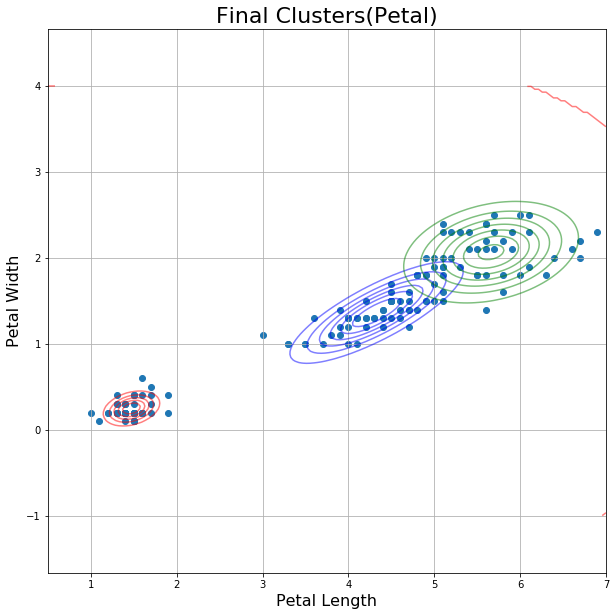

In [106]:
df1 = df_full.iloc[:,[2,3]].values
n_bins = 3  # use 3 bins for calibration_curve as we have 3 clusters here
x1 = np.linspace(0.5,7,150)  
x2 = np.linspace(-1,4,150)
X, Y = np.meshgrid(x1,x2) 
# fit the fuzzy-c-means
fcm = FCM(n_clusters=3)
fcm.fit(df1)

# outputs
fcm_centers = fcm.centers
fcm_labels  = fcm.u.argmax(axis=1)
fcm_centers[[1,2]]=fcm_centers[[2,1]]

Z1 = multivariate_normal(fcm_centers[seto], cov_seto)  
Z2 = multivariate_normal(fcm_centers[vers], cov_vers)
Z3 = multivariate_normal(fcm_centers[virg], cov_virg)
pos = np.empty(X.shape + (2,))                # a new array of given shape and type, without initializing entries
pos[:, :, 0] = X; pos[:, :, 1] = Y  

plt.figure(figsize=(10,10))
plt.scatter(df1[:,0], df1[:,1], marker='o')
plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5) 
plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5) 
plt.contour(X, Y, Z3.pdf(pos), colors="g" ,alpha = 0.5)

plt.xlabel('Petal Length', fontsize=16)                                         
plt.ylabel('Petal Width', fontsize=16)                             
plt.title('Final Clusters(Petal)', fontsize=22)
plt.axis('equal') 
plt.grid()  
plt.show()